#Universitario: Ceron Beimar Miguel
#Carrera: Ingenieria de Sistemas

In [ ]:
# Repositorio GITHub:
# https://github.com/Beimar98/SIS420/tree/main/Laboratorio%20Tareas/Laboratorio9

In [36]:
import pandas as pd
import numpy as np

#Regresión logística con sklearn

###Importar el dataset

In [37]:
dataset = pd.read_csv("data.csv")

In [38]:
dataset.head()

,uuid,meter_hours,category,is_new,manufacturer,region,price_usd,year
0,a6fd823a-4369-4737-ad41-b4ac40b77747,0,80,0,96,38,10000,1998
1,b7568591-ba29-4068-b0a3-826215dd03f8,461,111,0,108,71,10000,2010
2,6b819fee-6b16-4325-930d-d4937a289461,0,56,0,30,33,10100,2002
3,1025cf47-6f68-42f5-b649-2c6118e466e1,277,90,0,95,39,10100,2011
4,f6284931-a569-4528-a665-df9c4fedc543,905,87,0,208,35,10100,2011


In [39]:
np.average(dataset.is_new)

0.03960964408725603

#*escoendiendo la columna como factores X  a Age (anuncios de edad) Y [4] EStimatedSalary (Anuncios de salario estimado) es decir [2,3]  ; 
#* Escogiendo Y la columna Purchased (anuncios comprados)


In [65]:
x = dataset.iloc[:,[5,6]].values
y = dataset.iloc[:,3].values

##Separación de train y test por medio de sklearn

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

##Escalado de variables

In [67]:
from sklearn.preprocessing import StandardScaler
standard_x = StandardScaler()
x_train = standard_x.fit_transform(x_train)
x_test = standard_x.fit_transform(x_test)

##Entrenar el modelo de regresión logística

In [68]:
#Ajuste del modelo
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
reg.fit(x_train,y_train)

#Predicción
pred = reg.predict(x_test)

##Evaluación

In [69]:
pred,y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [70]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,pred)
conf_mat

array([[500,   0],
       [ 23,   0]])

In [71]:
75/len(y_test)

0.14340344168260039

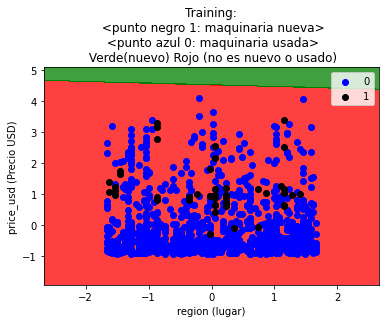

In [82]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Training:\n <punto negro 1: maquinaria nueva>\n <punto azul 0: maquinaria usada>\n Verde(nuevo) Rojo (no es nuevo o usado)')
plt.xlabel('region (lugar)')
plt.ylabel('price_usd (Precio USD)')
plt.legend()
plt.show()